# MachineHack Weekend Hackathon 18

https://www.machinehack.com/hackathons/detecting_anomalies_in_wafer_manufacturing_weekend_hackathon_18



# Overview

Detecting Anomalies can be a difficult task and especially in the case of labeled datasets due to some level of human bias introduced while labeling the final product as anomalous or good. These giant manufacturing systems need to be monitored every 10 milliseconds to capture their behavior which brings in lots of information and what we call the Industrial IoT (IIOT). Also, hardly a manufacturer wants to create an anomalous product. Hence, the anomalies are like a needle in a haystack which renders the dataset that is significantly Imbalanced. 

Capturing such a dataset using a machine learning model and making the model generalize can be fun. In this competition, we bring such a use-case from one of India's leading manufacturers of wafers(semiconductors). The dataset collected was anonymized to hide the feature names, also there are 1558 features that would require some serious domain knowledge to understand them. 

However, In the era of Deep Learning, we are challenging the data science community to come up with an anomaly detection model that can generalize well on the unseen set of data(Test data). In this hackathon, you will be creating a machine learning/ deep learning model to classify the anomalies correctly using Area under the curve(AUC) as metric.

 

## Dataset Description:

Train.csv - 1763 rows x 1559 columns

Test.csv - 756 rows x 1558 columns

Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission
 

### Attribute Description:

Feature_1 - Feature_1558 - Represents the various attributes that were collected from the manufacturing machine

Class - (0 or 1) - Represents Good/Anomalous class labels for the products
 

## Skills:

High Dimensionality Data, Overfitting-vs-Underfitting

Advanced Classification Techniques, Gradient Boosting, Neural Nets, etc

Feature engineering, Feature Selection Techniques

Optimizing Area under the curve(AUC) to generalize well on unseen data



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv('Train.csv')
train_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558,Class
0,100,160,1.6000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,20,83,4.1500,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,99,150,1.5151,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,40,40,1.0000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,234,19.5000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,1,1,2.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1759,40,200,5.0000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1760,96,218,2.2708,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1761,16,81,5.0625,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
train_data.shape

(1763, 1559)

In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Columns: 1559 entries, feature_1 to Class
dtypes: float64(1), int64(1558)
memory usage: 21.0 MB


In [5]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
feature_1,1763.0,53.094158,55.842014,1.0000,12.00,39.0,75.0,640.0
feature_2,1763.0,126.587067,129.859641,1.0000,33.50,96.0,159.0,640.0
feature_3,1763.0,3.423940,4.566858,0.0015,1.25,2.0,4.5,60.0
feature_4,1763.0,0.724334,0.446976,0.0000,0.00,1.0,1.0,1.0
feature_5,1763.0,0.002836,0.053194,0.0000,0.00,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
feature_1555,1763.0,0.015315,0.122837,0.0000,0.00,0.0,0.0,1.0
feature_1556,1763.0,0.014748,0.120575,0.0000,0.00,0.0,0.0,1.0
feature_1557,1763.0,0.009643,0.097750,0.0000,0.00,0.0,0.0,1.0
feature_1558,1763.0,0.001134,0.033672,0.0000,0.00,0.0,0.0,1.0


In [18]:
train_data.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5',
       'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10',
       ...
       'feature_1550', 'feature_1551', 'feature_1552', 'feature_1553',
       'feature_1554', 'feature_1555', 'feature_1556', 'feature_1557',
       'feature_1558', 'Class'],
      dtype='object', length=1559)

In [9]:
from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.model_selection import train_test_split

features = train_data.drop('Class',axis = 1)
target = train_data['Class']

In [133]:
#x = train_d.loc[:, features].values
x = StandardScaler().fit_transform(features) # normalizing the features
x

array([[ 0.84021237,  0.25737336, -0.39949961, ..., -0.12234515,
        -0.09867391, -0.03370042],
       [-0.59280719, -0.33574276,  0.15902958, ..., -0.12234515,
        -0.09867391, -0.03370042],
       [ 0.82229963,  0.1803453 , -0.41809535, ..., -0.12234515,
        -0.09867391, -0.03370042],
       ...,
       [ 0.76856139,  0.70413616, -0.25257358, ..., -0.12234515,
        -0.09867391, -0.03370042],
       [-0.66445817, -0.35114837,  0.35889541, ..., -0.12234515,
        -0.09867391, -0.03370042],
       [-0.30620328, -0.65926065, -0.50051673, ..., -0.12234515,
        -0.09867391, -0.03370042]])

In [134]:
normalised_features = pd.DataFrame(x,columns=features.columns)
normalised_features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,0.840212,0.257373,-0.399500,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
1,-0.592807,-0.335743,0.159030,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,8.895862,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,8.018497,-0.122345,-0.098674,-0.0337
2,0.822300,0.180345,-0.418095,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
3,-0.234552,-0.666963,-0.530918,-1.620979,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
4,-0.736109,0.827381,3.521156,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.933149,-0.967373,-0.311887,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
1759,-0.234552,0.565486,0.345206,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
1760,0.768561,0.704136,-0.252574,0.616911,-0.05333,-0.05333,-0.089468,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337
1761,-0.664458,-0.351148,0.358895,0.616911,-0.05333,-0.05333,11.177145,-0.047687,-0.067516,-0.112412,...,-0.071632,-0.063137,-0.075528,-0.05333,-0.063137,-0.063137,-0.124712,-0.122345,-0.098674,-0.0337


In [289]:
from sklearn.decomposition import PCA
pca_train_data = PCA(n_components=25)
principalComponents_train_data = pca_train_data.fit_transform(x)
principalComponents_train_data

array([[-5.58048275e-01, -7.16515303e-01, -3.18898153e-01, ...,
         1.00436083e-02, -3.48615099e-01,  1.98484054e-01],
       [ 8.37737033e-01,  2.77879803e+00,  4.51599610e+01, ...,
         4.57595123e-01, -8.31939702e-01,  8.61167854e-01],
       [-5.82241311e-01, -8.19751315e-01, -3.68210145e-01, ...,
         8.05339351e-02, -5.50994158e-02, -2.73801742e-02],
       ...,
       [-1.43146754e-01, -5.17879549e-01, -2.03924769e-01, ...,
         9.45138996e-02, -3.03213651e-01, -2.58729720e-01],
       [-5.58648959e-01, -7.40465151e-01, -2.37189291e-01, ...,
         1.35620441e-01, -1.23209676e-01, -5.65702008e-01],
       [-4.15518876e-01, -1.52689587e+00, -5.78465170e-01, ...,
        -1.85562190e+00, -2.01074467e+00,  3.89007660e+00]])

In [290]:
pca_normalised_features = pd.DataFrame(principalComponents_train_data)
pca_normalised_features

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,-0.558048,-0.716515,-0.318898,-0.206731,-0.169782,-0.037985,0.136408,0.455660,-1.643362,0.510866,...,0.407705,-0.916642,-0.492703,-0.335181,-0.047846,-0.319799,0.410761,0.010044,-0.348615,0.198484
1,0.837737,2.778798,45.159961,-3.646199,-0.029670,0.583927,0.053811,-0.724773,1.638031,0.287593,...,1.423503,0.199652,0.370881,-1.077504,-2.187792,4.123523,1.427168,0.457595,-0.831940,0.861168
2,-0.582241,-0.819751,-0.368210,-0.197020,0.379266,-0.030617,0.193156,0.621970,-1.999939,0.638865,...,-0.727901,0.921544,-0.012318,0.029063,-0.225241,-0.122732,-0.166258,0.080534,-0.055099,-0.027380
3,-0.593072,-0.653044,-0.184739,-0.227168,-0.195470,-0.041866,0.106036,0.354489,-1.247171,0.483833,...,0.382916,-0.833296,0.264780,-0.054057,-0.305493,-0.378308,-0.358172,-0.010193,-0.245576,-0.089439
4,-0.232055,-0.552640,-0.045577,-0.079442,-0.156646,-0.021530,0.092923,0.636596,-0.961730,0.194614,...,0.326762,-0.538156,0.207099,0.210538,-0.749217,-0.483319,-0.535025,0.087476,-0.077933,-0.189193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1758,-0.634727,-0.862651,-0.288634,-0.196237,-0.207512,-0.062232,0.074970,0.315069,-1.001584,0.359792,...,0.496431,-1.314711,0.063869,0.209690,-0.943272,-0.300201,-0.552895,0.211515,-0.632590,-0.115938
1759,-0.395848,-0.859442,-0.353699,-0.242991,-0.234461,-0.070808,0.134367,0.589440,-1.939173,0.537665,...,0.646847,-1.750854,-0.377068,0.192892,-0.570580,-0.327897,1.390710,1.314297,-0.862657,-2.161395
1760,-0.143147,-0.517880,-0.203925,-0.099210,-0.123212,-0.043295,0.126928,0.428650,-1.377671,0.266091,...,0.251854,-0.605294,0.195160,0.112145,-0.684311,-0.396460,-0.388438,0.094514,-0.303214,-0.258730
1761,-0.558649,-0.740465,-0.237189,-0.117568,-0.225293,-0.065648,0.127242,0.549807,-1.334187,0.290346,...,0.880484,-1.298150,0.115051,0.280699,-1.325528,-0.976018,-1.109694,0.135620,-0.123210,-0.565702


In [291]:
print('Explained variation per principal component: {}'.format(pca_train_data.explained_variance_ratio_))

Explained variation per principal component: [0.02188486 0.01962761 0.0170717  0.01536517 0.01509653 0.01448713
 0.01378712 0.01318886 0.01273219 0.01201977 0.01133953 0.01102462
 0.01069774 0.01063819 0.01044874 0.00996767 0.00977277 0.00892582
 0.00886465 0.00871982 0.0085213  0.00837459 0.00819937 0.00799044
 0.00777366]


In [269]:
train_features, validation_features, train_target, validation_target = train_test_split(pca_normalised_features,target,test_size = 0.20, random_state = 12)

In [270]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=(50,30,20),activation= 'relu',solver ='adam', batch_size = 30,
                      alpha = .01,max_iter=100,learning_rate= 'adaptive',verbose=3, random_state = 12) 

In [271]:
model.fit(train_features,train_target)

Iteration 1, loss = 0.34484071
Iteration 2, loss = 0.22899839
Iteration 3, loss = 0.21367682
Iteration 4, loss = 0.21538479
Iteration 5, loss = 0.20940632
Iteration 6, loss = 0.20990756
Iteration 7, loss = 0.21000401
Iteration 8, loss = 0.21181763
Iteration 9, loss = 0.20474122
Iteration 10, loss = 0.20889592
Iteration 11, loss = 0.20516501
Iteration 12, loss = 0.20702862
Iteration 13, loss = 0.20688293
Iteration 14, loss = 0.21143226
Iteration 15, loss = 0.20528772
Iteration 16, loss = 0.21153295
Iteration 17, loss = 0.20306328
Iteration 18, loss = 0.20082699
Iteration 19, loss = 0.20933037
Iteration 20, loss = 0.20428364
Iteration 21, loss = 0.20373840
Iteration 22, loss = 0.19887185
Iteration 23, loss = 0.19891788
Iteration 24, loss = 0.20632979
Iteration 25, loss = 0.19701057
Iteration 26, loss = 0.19601021
Iteration 27, loss = 0.19818988
Iteration 28, loss = 0.19983043
Iteration 29, loss = 0.19649561
Iteration 30, loss = 0.19725974
Iteration 31, loss = 0.19678370
Iteration 32, los

MLPClassifier(alpha=0.01, batch_size=30, hidden_layer_sizes=(50, 30, 20),
              learning_rate='adaptive', max_iter=100, random_state=12,
              verbose=3)

In [53]:
train_model_predict = model.predict(train_features)

In [54]:
from sklearn.metrics import confusion_matrix

In [272]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

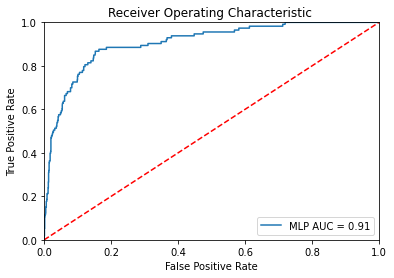

In [273]:
fpr_train, tpr_train, threshold = roc_curve(train_target, model.predict_proba(train_features)[:,1])
roc_auc_train = auc(fpr_train, tpr_train)

# image drawing
plt.figure()
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr_train, tpr_train, label = 'MLP AUC = %0.2f' % roc_auc_train)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

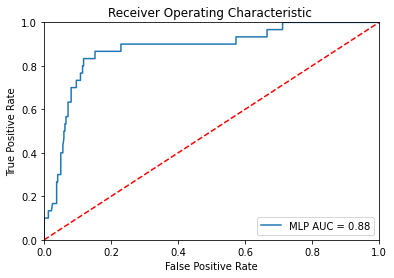

In [274]:
fpr_test, tpr_test, threshold_test = roc_curve(validation_target, model.predict_proba(validation_features)[:,1])
roc_auc_test = auc(fpr_test, tpr_test)

# image drawing
plt.figure()
plt.title('Receiver Operating Characteristic ')
plt.plot(fpr_test, tpr_test, label = 'MLP AUC = %0.2f' % roc_auc_test)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [130]:
mlp = MLPClassifier()

In [131]:
parameter_space = {
    'max_iter' : [50,100],
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,),(50,30,20),],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001,0.01,0.1, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [132]:
%%timeit
from sklearn.model_selection import GridSearchCV


clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3, verbose = 2)
clf.fit(train_features,train_target)

Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   52.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.5min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 23.5min finished
C:\Users\DELL\Anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   51.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.5min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.7min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 22.6min finished
C:\Users\DELL\Anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   49.3s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 18.6min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 22.6min finished
C:\Users\DELL\Anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 256 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 19.3min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 23.4min finished
C:\Users\DELL\Anaconda3\envs\deeplearning_env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 256 candidates, totalling 768 fits


KeyboardInterrupt: 

In [209]:
clf.best_params_

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [256]:
test_data = pd.read_csv('Test.csv')
test_data

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,108.0,179.0,1.6574,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,60.0,468.0,7.8000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,60.0,120.0,2.0000,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
752,1.0,1.0,2.0000,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
753,12.0,101.0,8.4166,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
754,31.0,88.0,2.8387,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
test_features = test_data

In [275]:
test_x = StandardScaler().fit_transform(test_features) # normalizing the features
test_x

array([[ 0.10288989,  2.43714603,  0.88596725, ..., -0.15167089,
        -0.12151173, -0.06311944],
       [ 0.92764545,  0.33643624, -0.39831034, ..., -0.15167089,
        -0.12151173, -0.06311944],
       [-0.91087215, -0.95742653, -0.32668049, ..., -0.15167089,
        -0.12151173, -0.06311944],
       ...,
       [-0.72186567, -0.23053733,  1.01488425, ..., -0.15167089,
        -0.12151173, -0.06311944],
       [-0.39539993, -0.32503293, -0.15132745, ..., -0.15167089,
        -0.12151173, -0.06311944],
       [-0.08611659, -0.33230182, -0.37361832, ..., -0.15167089,
        -0.12151173, -0.06311944]])

In [276]:
normalised_test_features = pd.DataFrame(test_x,columns=test_features.columns)
normalised_test_features

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_1549,feature_1550,feature_1551,feature_1552,feature_1553,feature_1554,feature_1555,feature_1556,feature_1557,feature_1558
0,0.102890,2.437146,0.885967,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
1,0.927645,0.336436,-0.398310,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
2,-0.910872,-0.957427,-0.326680,-1.639453,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
3,0.102890,2.437146,0.885967,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
4,0.102890,-0.092428,-0.326680,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,-0.910872,-0.957427,-0.326680,-1.639453,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
752,-0.910872,-0.957427,-0.326680,-1.639453,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
753,-0.721866,-0.230537,1.014884,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119
754,-0.395400,-0.325033,-0.151327,0.609960,-0.063119,-0.063119,-0.036394,-0.036394,-0.072932,-0.142278,...,-0.109764,-0.089443,-0.036394,-0.063119,-0.063119,-0.089443,-0.137361,-0.151671,-0.121512,-0.063119


In [277]:
principalComponents_test_data = pca_train_data.fit_transform(test_x)
principalComponents_test_data

array([[-0.49630515,  0.09185567, -0.11652848],
       [-0.922479  , -0.77390084, -0.70522466],
       [-0.75846296, -0.4554962 , -0.39970647],
       ...,
       [-1.04454381, -0.90902856, -0.91307198],
       [-0.78510504, -0.59323258, -0.59626601],
       [-0.52070852, -0.79335363, -0.5406788 ]])

In [278]:
pca_normalised_test_features = pd.DataFrame(principalComponents_test_data)
pca_normalised_test_features

,0,1,2
0,-0.496305,0.091856,-0.116528
1,-0.922479,-0.773901,-0.705225
2,-0.758463,-0.455496,-0.399706
3,2.090920,5.307219,0.853872
4,2.106260,12.196516,-0.953055
...,...,...,...
751,-0.699218,-0.248916,-0.367674
752,-0.946506,-1.005222,-1.031742
753,-1.044544,-0.909029,-0.913072
754,-0.785105,-0.593233,-0.596266


In [279]:
prediction = model.predict(pca_normalised_test_features)

In [280]:
prediction

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [281]:
submission_data=pd.read_csv('Sample_submission.csv')

In [282]:
submission_data['Class']=prediction

In [283]:
submission_data.to_csv('Submission11_NN_PCA.csv',index=False)